
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


,Timestamp_f1,MM_Timestamp_f1,THEORETICAL_TONNAGE_f3,Coke_Rate_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,SNORT_VALVE_POSITION_f3,COLD_BLAST_MOISTURE_f3,HOST_BLAST_MOISTURE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,NAT_GAS _INJECTION_f3,HOT_BLAST_PRESSURE_f3,TOP_PRESS_f3,TOP_TEMP_HIGHEST_f3,Top_Gas_ETACO_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,SILICON_f3,SULFUR_f3,MANGANESE_f3,PHOSPHOROUS_f3,HOT_METAL_TEMP_f3,Slag_CaO_day_avg_f3,Slag_MgO_day_avg_f3,Slag_SiO2_f3,Slag_Al2O3_day_avg_f3,#14 WEST STOCKROD LEVEL,#14 EAST STOCKROD LEVEL,#14 RADAR ROD NORTH LEVEL,#14 RADAR ROD SOUTH LEVEL,Charges_per_hour_f3,BF14 material 1 weight,BF14 extra coke weight,BF14 material 2 weight,BF14 material 2 weight.1,BF14 material 3 weight,BF14 material 3 weight.1,BF14 material 4 weight,BF14 material 4 weight.1,BF14 material 5 weight,BF14 material 5 weight.1,BF14 material 6 weight,BF14 material 6 weight.1,BF14 material 7 weight,BF14 material 7 weight.1,BF14 material 8 weight,BF14 material 8 weight.1,BF14 material 9 weight,BF14 material 9 weight.1,BF14 material 10 weight,BF14 material 10 weight.1,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,pd_index,date_f1,CNUM,LNUM_f1,SI_f1,S_f1,MN_f1,P_f1,CU_f1,NI_f1,CR_f1,MO_f1,TI_f1,HM_Temp_f1,ProbeSi_f1,Time_f1,Compliant_eq_1_f1,C_perce_sat_f1,Before_After_f1,Good_bad_f1,date,Slag_Time_f2,Open_Time_f2,Close_Time_f2,Taphole_f2,Pipe_burn_hole_f2,Taphole_Length_f2,Clay_box_f2,Clay_Close_hole_ft3_f2,Clay_temp_f2,Drill_bit_size_f2,Drill_shafts_used_f2,Cast_Avg_Temp_f2,Cast_Avg_Si_f2,Cast_Avg_S_f2,Cast_Avg_Mn_f2,Cast_Avg_P_f2,Cast_Avg_Cu_f2,Cast_Avg_Ni_f2,Cast_Avg_Cr_f2,Cast_Avg_Mo_f2,Cast_Avg_Ti_f2,Slag_Fe_f2,Slag_SiO2_f2,Slag_Al2O3_f2,Slag_CaO_f2,Slag_MgO_f2,Slag_S_f2,Slag_K2O_f2,Slag_B_SiO2_f2,Slag_TiO2_f2,cokerate_f4
0,2021-08-01 01:23:00,2021-08-01 00:00:00,6006,992,1999.604384,179.749638,98.334297,4.997585,8.084517,2.510680,0.0,4034.234339,34.357590,17.398326,245.335109,0.458303,22.322068,18.729296,3.559210,54.250139,0.776,0.052,0.510,0.068,2736.960938,37.830002,10.577999,38.029511,7.084000,8.720904,-0.001068,8.455500,8.706066,4.172247,226085.1667,309.166667,653422.0,15730100,103426.0000,2756060,0,0,0,0,0.000000,0,31782.33333,848140,0,0,21118.33333,562140,9022.666667,212980,158.478922,245.634175,145.396538,220.717349,0,44409,2809,182,1.152,0.042,0.577,0.077,0.003,0.020,0.052,0.002,0.036,2677,NaN,0.057639,NaN,4.692156,B,0.0,8/1/2021 0:00,00:59,00:55,03:23,2,0,11.4,602,2.75,165,2.12,1,2714,1.048,0.046,0.546,0.075,0.003,0.018,0.051,0.002,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41,992
1,2021-08-01 01:23:00,2021-08-01 00:01:00,6006,992,2000.288837,179.765945,98.334297,5.000531,8.079545,2.489381,0.0,4024.947376,34.328821,17.483486,251.198262,0.458277,22.335329,18.731320,3.559234,54.194257,0.776,0.052,0.510,0.068,2736.960938,37.830002,10.577999,38.029511,7.084000,3.973097,-0.001068,8.617396,8.988543,4.166692,226655.5000,927.500000,651306.0,15730100,103438.0000,2756060,0,0,0,0,0.000000,0,31787.00000,848140,0,0,21115.00000,562140,8988.000000,212980,159.637733,252.459217,145.570895,226.360600,0,44409,2809,182,1.152,0.042,0.577,0.077,0.003,0.020,0.052,0.002,0.036,2677,NaN,0.057639,NaN,4.692156,B,0.0,8/1/2021 0:00,00:59,00:55,03:23,2,0,11.4,602,2.75,165,2.12,1,2714,1.048,0.046,0.546,0.075,0.003,0.018,0.051,0.002,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41,992
2,2021-08-01 01:23:00,2021-08-01 00:02:00,6006,992,1999.242862,179.782251,98.334297,5.003476,8.074573,2.489037,0.0,4011.601682,34.300052,17.260358,242.609669,0.458250,22.348590,18.733343,3.559259,54.138374,0.776,0.052,0.510,0.068,2736.960938,37.830002,10.577999,38.029511,7.084000,0.158669,-0.001068,8.654926,9.076585,4.166692,227225.8333,1545.833333,649190.0,15730100,103450.0000,2756060,0,0,0,0,0.000000,0,31791.66667,848140,0,0,21111.66667,562140,8953.333333,212980,160.796544,252.645736,145.745252,230.297540,0,44409,2809,182,1.152,0.042,0.577,0.077,0.003,0.020,0.052,0.002,0.036,2677,NaN,0.057639,


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,date_f1,CNUM,LNUM_f1,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
1,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,44562.0,2.0,168.666667,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
2,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,44562.0,6.0,137.450000,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
3,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,44562.0,7.0,156.684211,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
4,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,44562.0,8.0,150.869919,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
5,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,44562.0,9.0,160.218182,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,44561.0,4344.0,147.500000,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1391,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,44561.0,4345.0,147.500000,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1392,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,44561.0,4346.0,174.000000,21.048415,18.309327,4.129862,55.140373,166.903493,181.684648,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1393,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,44561.0,4347.0,160.000000,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

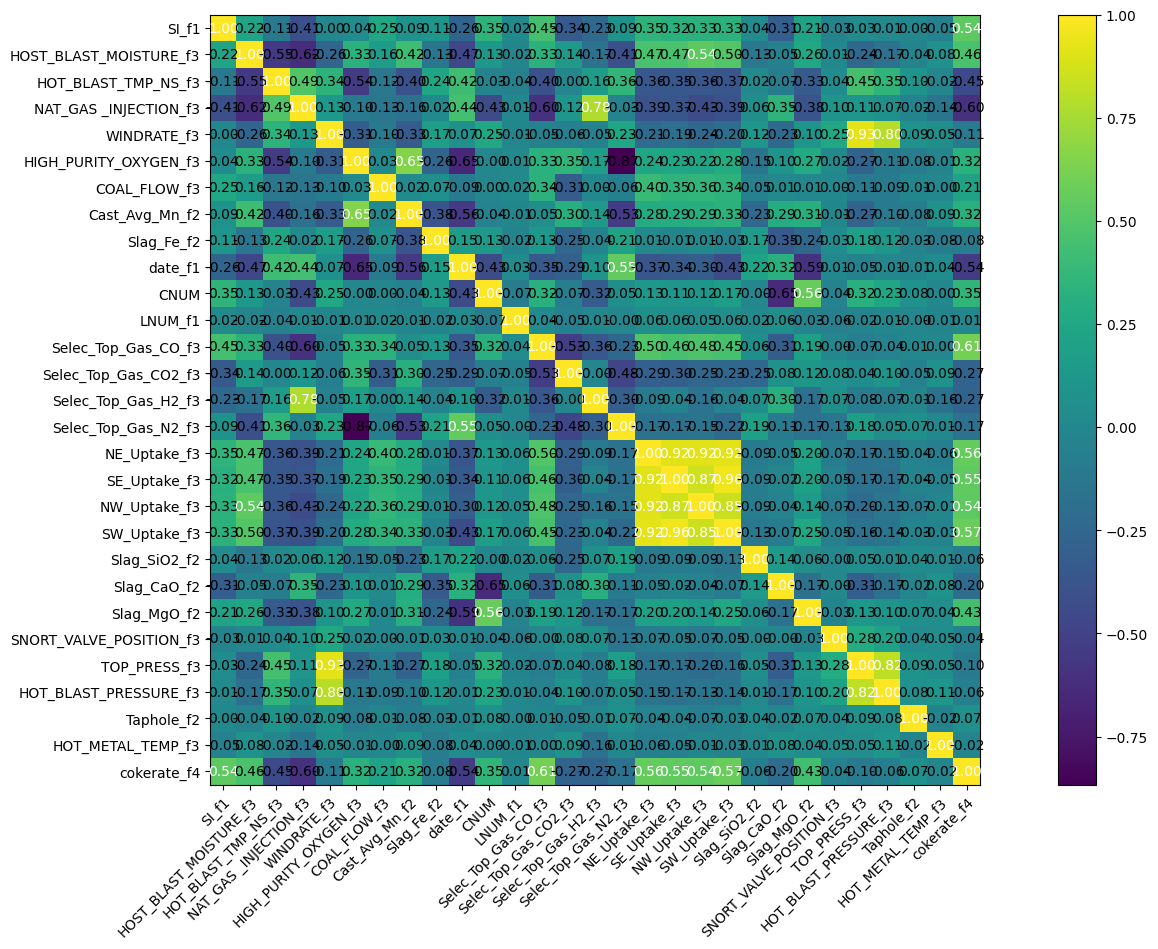

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,date_f1,CNUM,LNUM_f1,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
1,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,44562.0,2.0,168.666667,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
2,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,44562.0,6.0,137.450000,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
3,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,44562.0,7.0,156.684211,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
4,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,44562.0,8.0,150.869919,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
5,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,44562.0,9.0,160.218182,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,0.762500,2021-12-31 13:10:00,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,44561.0,4344.0,147.500000,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1391,0.646000,2021-12-31 14:41:00,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,44561.0,4345.0,147.500000,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1392,0.654667,2021-12-31 16:15:00,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,44561.0,4346.0,174.000000,21.048415,18.309327,4.129862,55.140373,166.903493,181.684648,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1393,0.591667,2021-12-31 17:40:00,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,44561.0,4347.0,160.000000,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0



## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


,delta_SI,mov_avg_SI,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,sec,min,hour,day,month,year,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,CNUM,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.000000,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,0,45,0,1,1,2022,0.0,0.354,0.16,2.0,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,0.000000,0.000000,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,0,43,8,1,1,2022,0.0,0.313,0.83,6.0,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,-0.044380,0.000000,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,0,17,10,1,1,2022,0.0,0.360,0.10,7.0,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,0.009040,0.000000,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,0,40,12,1,1,2022,0.0,0.319,0.34,8.0,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,0.101686,0.000000,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,0,6,15,1,1,2022,0.0,0.335,0.28,9.0,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0.109500,0.004444,0.762500,2021-12-31 13:10:00,4.204430,2169.361647,9297.484543,185.046491,0.0,0,10,13,31,12,2021,0.0,0.343,0.30,4344.0,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1390,-0.116500,0.008900,0.646000,2021-12-31 14:41:00,4.208539,2169.079601,9312.779010,185.053796,0.0,0,41,14,31,12,2021,0.0,0.324,0.30,4345.0,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1391,0.008667,-0.037618,0.654667,2021-12-31 16:15:00,4.212648,2168.797556,9303.753420,185.007919,0.0,0,15,16,31,12,2021,0.0,0.325,0.16,4346.0,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1392,-0.063000,-0.014340,0.591667,2021-12-31 17:40:00,4.217784,2168.444999,9333.448101,184.942435,0.0,0,40,17,31,12,2021,0.0,0.335,0.26,4347.0,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0


In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


,delta_SI,mov_avg_SI,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,sec,min,hour,day,month,year,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,CNUM,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.000000,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,0,45,0,1,1,2022,0.0,0.354,0.16,2.0,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,0.000000,0.000000,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,0,43,8,1,1,2022,0.0,0.313,0.83,6.0,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,-0.044380,0.000000,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,0,17,10,1,1,2022,0.0,0.360,0.10,7.0,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,0.009040,0.000000,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,0,40,12,1,1,2022,0.0,0.319,0.34,8.0,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,0.101686,0.000000,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,0,6,15,1,1,2022,0.0,0.335,0.28,9.0,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0.109500,0.004444,0.762500,2021-12-31 13:10:00,4.204430,2169.361647,9297.484543,185.046491,0.0,0,10,13,31,12,2021,0.0,0.343,0.30,4344.0,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1390,-0.116500,0.008900,0.646000,2021-12-31 14:41:00,4.208539,2169.079601,9312.779010,185.053796,0.0,0,41,14,31,12,2021,0.0,0.324,0.30,4345.0,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1391,0.008667,-0.037618,0.654667,2021-12-31 16:15:00,4.212648,2168.797556,9303.753420,185.007919,0.0,0,15,16,31,12,2021,0.0,0.325,0.16,4346.0,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1392,-0.063000,-0.014340,0.591667,2021-12-31 17:40:00,4.217784,2168.444999,9333.448101,184.942435,0.0,0,40,17,31,12,2021,0.0,0.335,0.26,4347.0,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0


In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,sec,min,hour,day,month,year,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,CNUM,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.000000,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0,45,0,1,1,2022,0.0,0.354,0.16,2.0,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,0.000000,0.000000,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0,43,8,1,1,2022,0.0,0.313,0.83,6.0,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,-0.044380,0.000000,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0,17,10,1,1,2022,0.0,0.360,0.10,7.0,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,0.009040,0.000000,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0,40,12,1,1,2022,0.0,0.319,0.34,8.0,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,0.101686,0.000000,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0,6,15,1,1,2022,0.0,0.335,0.28,9.0,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0.109500,0.004444,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0,10,13,31,12,2021,0.0,0.343,0.30,4344.0,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1390,-0.116500,0.008900,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0,41,14,31,12,2021,0.0,0.324,0.30,4345.0,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1391,0.008667,-0.037618,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0,15,16,31,12,2021,0.0,0.325,0.16,4346.0,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1392,-0.063000,-0.014340,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0,40,17,31,12,2021,0.0,0.335,0.26,4347.0,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0



## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

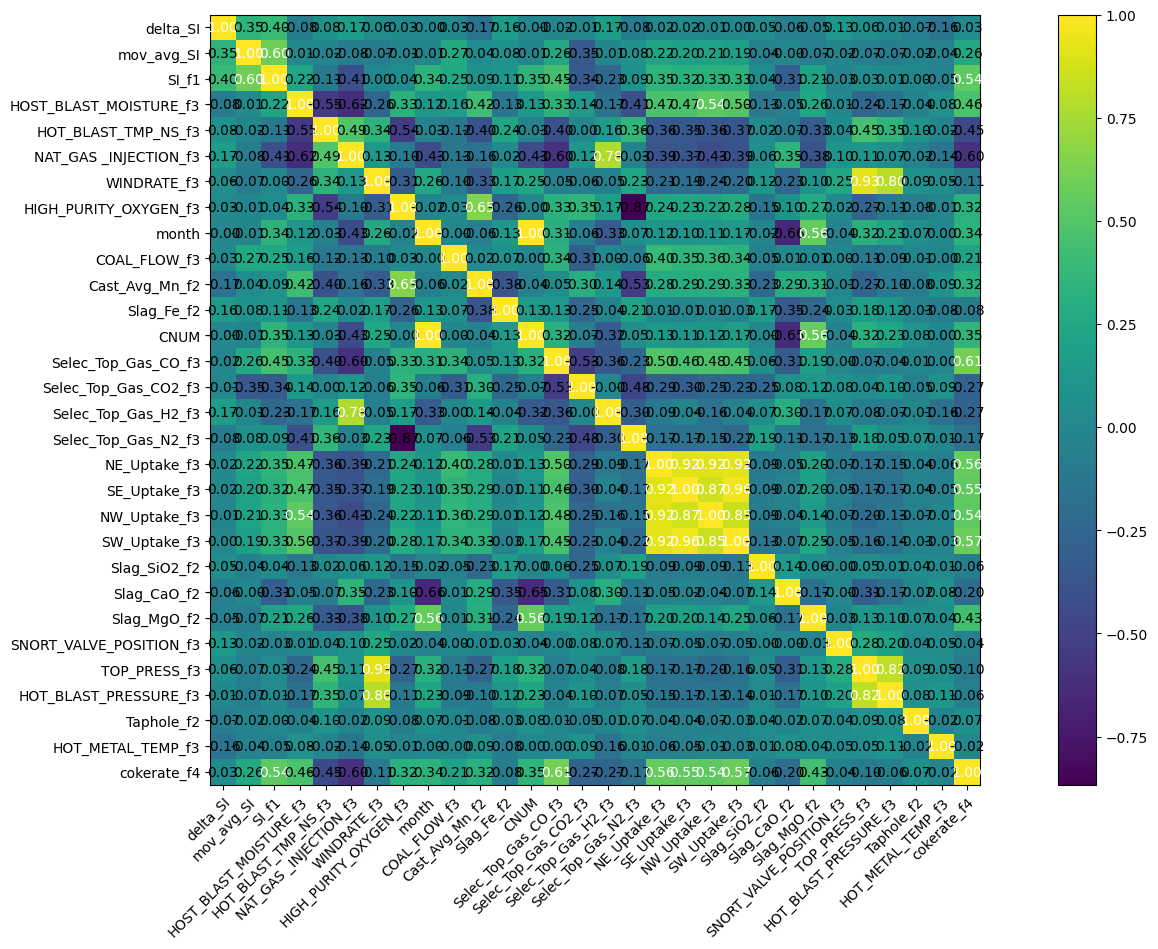

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
        ###################################################################################
        ## Trying weighted loss al, to focus on first 4, if not work, remove this whole block
        
        # Weighted time-step loss (more focus on early steps)
        weights = torch.tensor([5, 4, 4, 2, 1, 1, 1, 1, 1, 1], device=pred.device, dtype=pred.dtype)
        weights = weights / weights.sum()  # Normalize

        pred_seq = idx_pred[:, -tsGPT_obj.block_size:, :]  # [B, 10, F]
        target_seq = yb                                     # [B, 10, F]

        loss_all = ((pred_seq - target_seq) ** 2 * weights.view(1, -1, 1)).mean()
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.894197
Loss_SI: 0.9793134927749634 Loss_all: 0.12814505398273468
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.046972
Loss_SI: 0.03678825870156288 Loss_all: 0.13862904906272888
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.021460
Loss_SI: 0.012109214439988136 Loss_all: 0.10561493039131165
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.021613
Loss_SI: 0.011909467168152332 Loss_all: 0.10894768685102463
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.026703
Loss_SI: 0.0167002584785223 Loss_all: 0.11672834306955338
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.018473
Loss_SI: 0.010580814443528652 Loss_all: 0.08950183540582657
Prediction shape: torch.Size([32, 35])
===


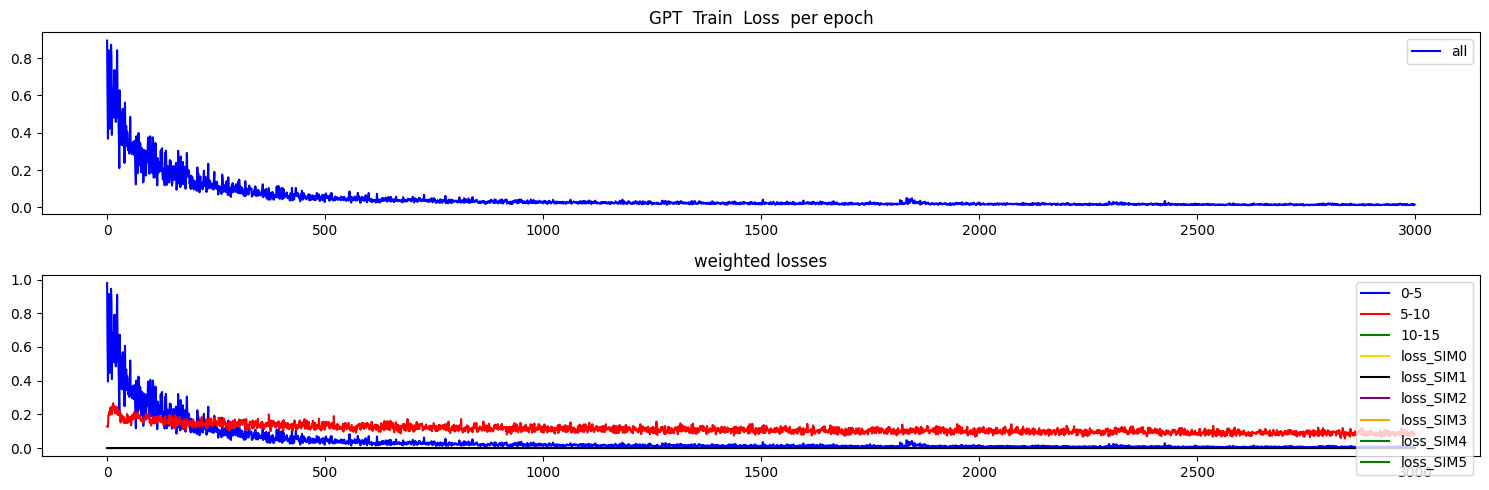

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


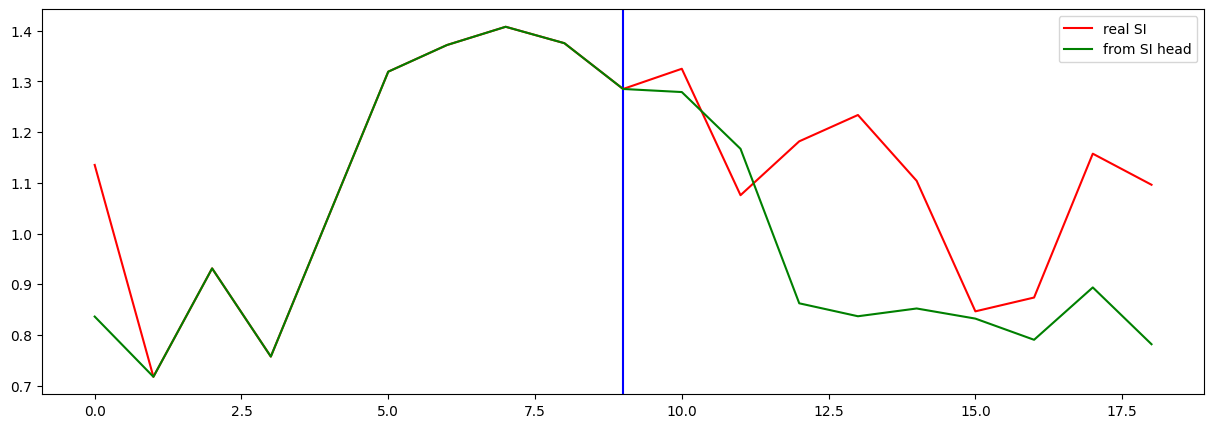

Testing R**2 - (all) - (no inputs):  0.9845039008226465
Testing R**2 - (f2) - SI full (no inputs):  -3.4667362326150766
Testing R**2 - SI head only (no inputs):  -2.9263144519677056
0 ...index R**2 (no inputs):  -0.07756881123359816
1 ...index R**2 (no inputs):  -0.036933425663699504
2 ...index R**2 (no inputs):  -3.4667362326150766
3 ...index R**2 (no inputs):  -0.7412762913228121
4 ...index R**2 (no inputs):  -0.22196215523122942
5 ...index R**2 (no inputs):  -0.3947337406004352
6 ...index R**2 (no inputs):  -135.8925584665383
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8512065315825439
10 ...index R**2 (no inputs):  -0.34395719636294686
11 ...index R**2 (no inputs):  -150.23479899749276
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.6358241388971693
16 ...index R**2 (no inputs):  -0.10443250659959702
17 ...index R**2 (no inputs):  -669.

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.402725
Loss_SI: 0.43333184719085693 Loss_all: 0.12726405262947083
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.272719
Loss_SI: 0.28890466690063477 Loss_all: 0.12704789638519287
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.082467
Loss_SI: 0.07555903494358063 Loss_all: 0.14463546872138977
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.044149
Loss_SI: 0.03685809299349785 Loss_all: 0.10977055132389069
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.025130
Loss_SI: 0.014770560897886753 Loss_all: 0.1183658018708229
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.027532
Loss_SI: 0.019582269713282585 Loss_all: 0.09907487779855728
Prediction shape: torch.Size([32, 35])
===


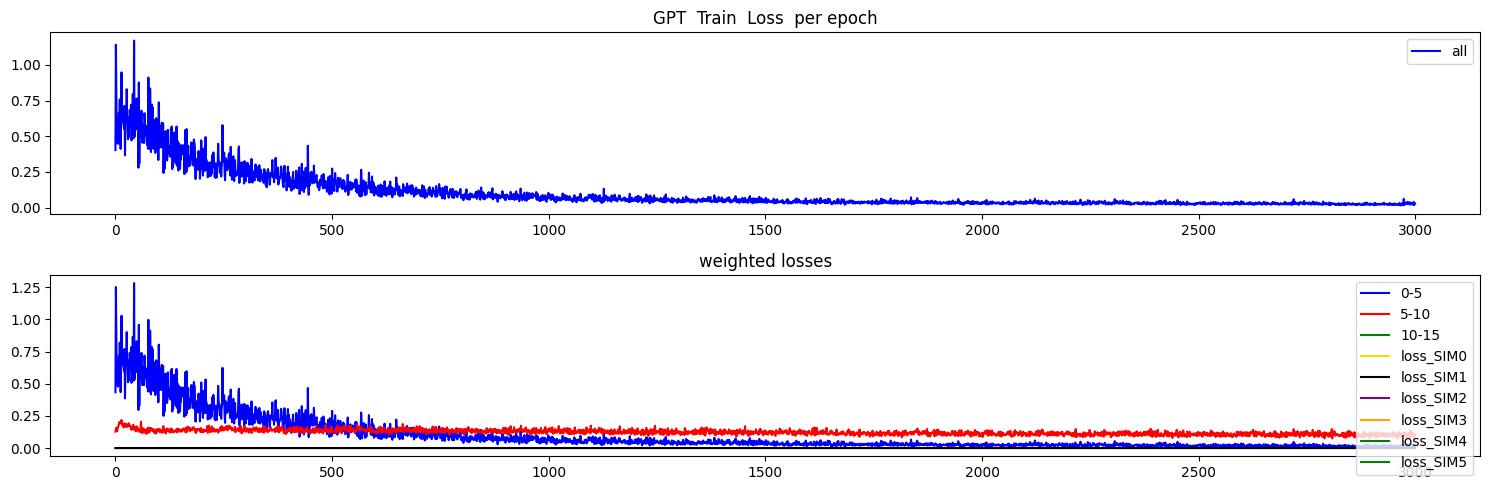

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


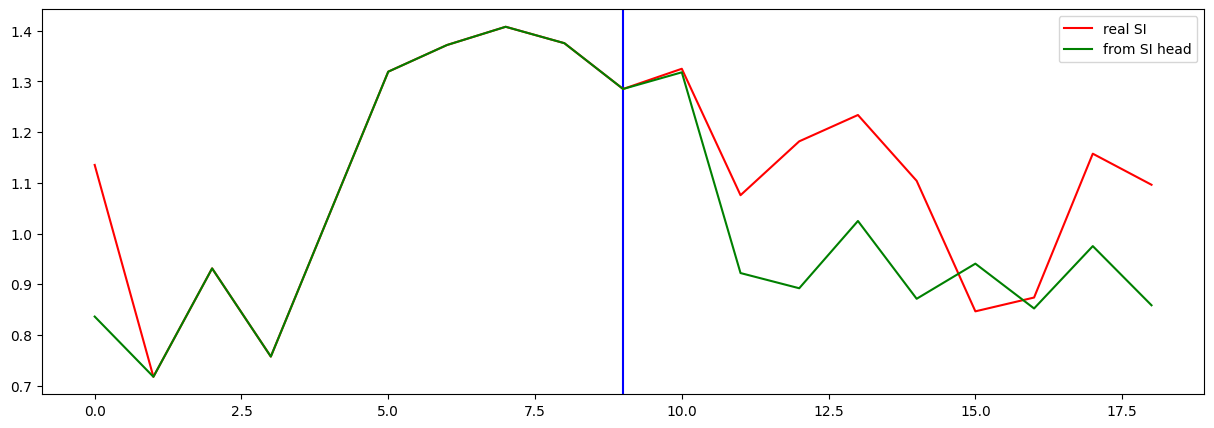

Testing R**2 - (all) - (no inputs):  0.9609803928930942
Testing R**2 - (f2) - SI full (no inputs):  -0.7530767804519733
Testing R**2 - SI head only (no inputs):  -2.1131864110784733
0 ...index R**2 (no inputs):  -0.9823930653744777
1 ...index R**2 (no inputs):  0.030502537978569166
2 ...index R**2 (no inputs):  -0.7530767804519733
3 ...index R**2 (no inputs):  -12.484241186056622
4 ...index R**2 (no inputs):  -0.632504514984944
5 ...index R**2 (no inputs):  -2.513943536395743
6 ...index R**2 (no inputs):  -343.61752729133707
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.07015117759390321
10 ...index R**2 (no inputs):  -0.16630357839179588
11 ...index R**2 (no inputs):  -647.3809677160721
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.1944038539816768
16 ...index R**2 (no inputs):  -0.1827736507882607
17 ...index R**2 (no inputs):  -1927.1394

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.675004
Loss_SI: 0.7356049418449402 Loss_all: 0.1295938789844513
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.198977
Loss_SI: 0.19985660910606384 Loss_all: 0.1910596787929535
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.164692
Loss_SI: 0.17042528092861176 Loss_all: 0.1130913645029068
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.094376
Loss_SI: 0.08949179947376251 Loss_all: 0.1383378803730011
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.071858
Loss_SI: 0.0673360675573349 Loss_all: 0.11255970597267151
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.060754
Loss_SI: 0.05390874296426773 Loss_all: 0.12236128747463226
Prediction shape: torch.Size([32, 35])
===


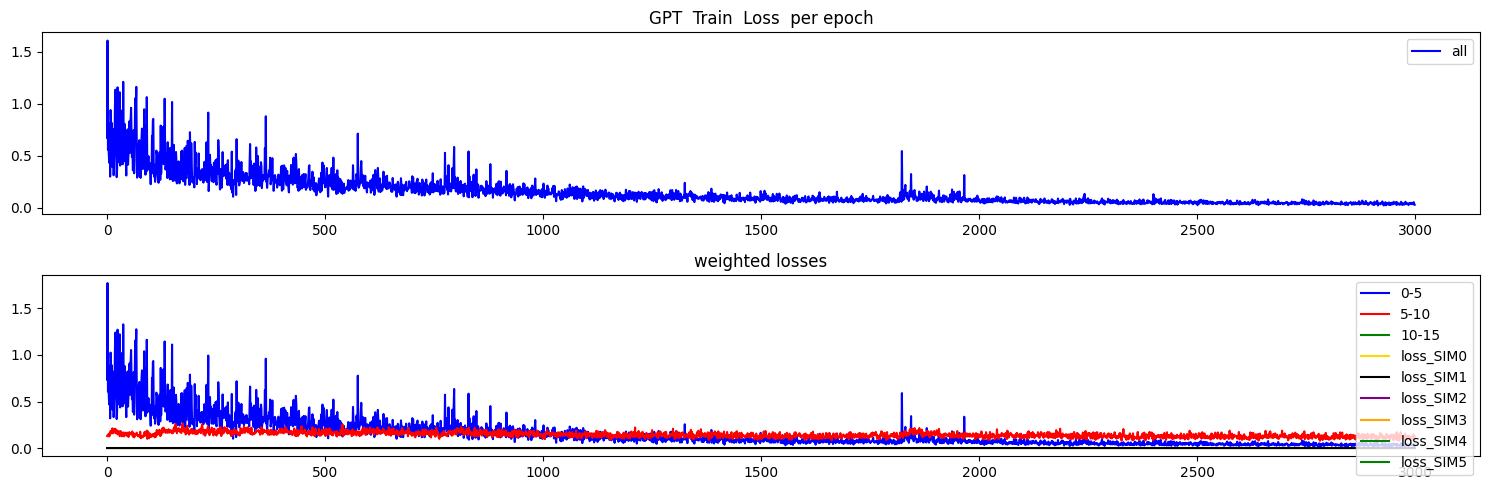

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


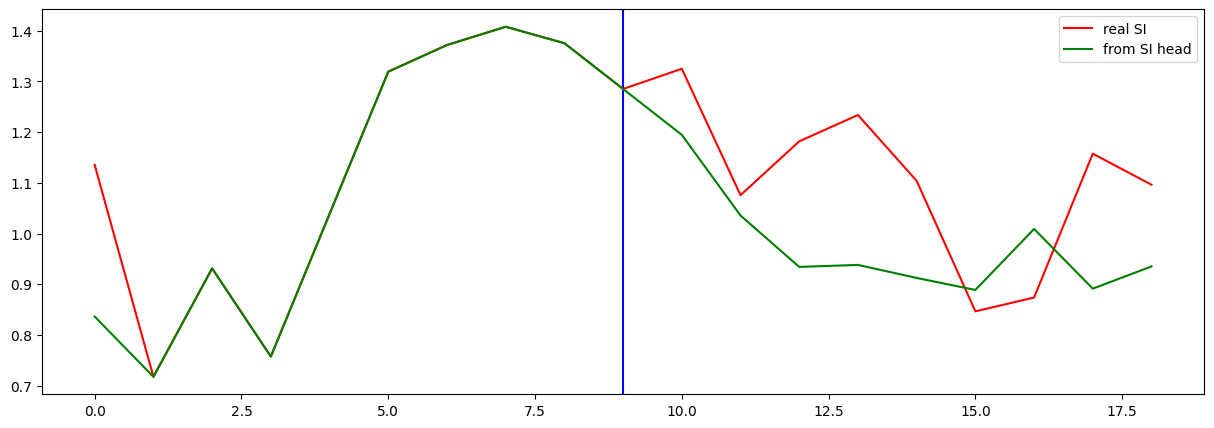

Testing R**2 - (all) - (no inputs):  0.985543518904503
Testing R**2 - (f2) - SI full (no inputs):  -4.917515332898914
Testing R**2 - SI head only (no inputs):  -0.8552852075697905
0 ...index R**2 (no inputs):  -0.8332570802161623
1 ...index R**2 (no inputs):  -0.6463530360791687
2 ...index R**2 (no inputs):  -4.917515332898914
3 ...index R**2 (no inputs):  -0.6884235876642886
4 ...index R**2 (no inputs):  -0.08082214795785814
5 ...index R**2 (no inputs):  -0.25714071244395753
6 ...index R**2 (no inputs):  -329.049489273416
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.1995337933926441
10 ...index R**2 (no inputs):  0.07441416009670743
11 ...index R**2 (no inputs):  -292.949873301425
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.138837129832561
16 ...index R**2 (no inputs):  -0.0716271088113214
17 ...index R**2 (no inputs):  -4440.47275619640

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.744906
Loss_SI: 0.8157070279121399 Loss_all: 0.10770075023174286
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.399513
Loss_SI: 0.4223322868347168 Loss_all: 0.19413486123085022
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.127224
Loss_SI: 0.12895691394805908 Loss_all: 0.11162937432527542
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.143174
Loss_SI: 0.14365684986114502 Loss_all: 0.13882824778556824
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.066664
Loss_SI: 0.05975887179374695 Loss_all: 0.12881357967853546
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.049025
Loss_SI: 0.040314268320798874 Loss_all: 0.1274246871471405
Prediction shape: torch.Size([32, 35])
===


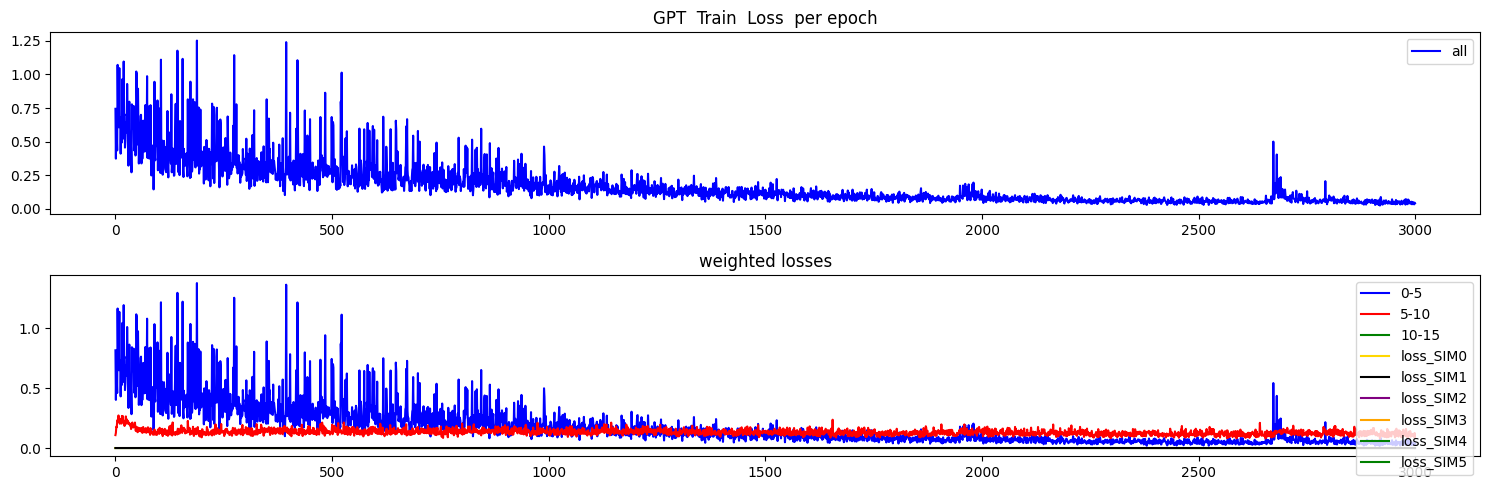

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


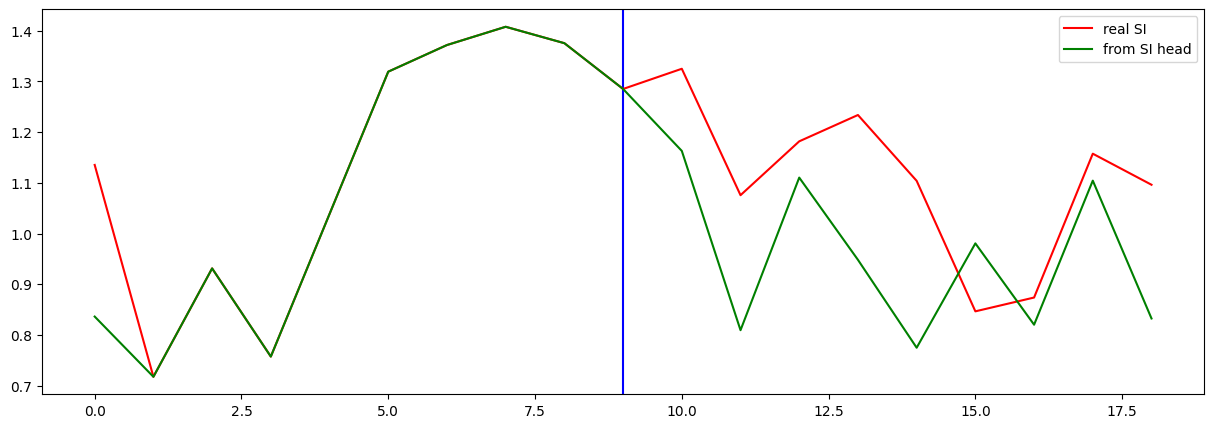

Testing R**2 - (all) - (no inputs):  0.9534413117493231
Testing R**2 - (f2) - SI full (no inputs):  -3.608301080086396
Testing R**2 - SI head only (no inputs):  -1.8946505354054635
0 ...index R**2 (no inputs):  -1.2502250288998615
1 ...index R**2 (no inputs):  0.023278171981417684
2 ...index R**2 (no inputs):  -3.608301080086396
3 ...index R**2 (no inputs):  -0.5846499831346652
4 ...index R**2 (no inputs):  -0.3935757109086129
5 ...index R**2 (no inputs):  -3.121875303413362
6 ...index R**2 (no inputs):  -659.7689290984771
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.08817276564727328
10 ...index R**2 (no inputs):  -0.033538460113903934
11 ...index R**2 (no inputs):  -251.07040717339186
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.846034903365851
16 ...index R**2 (no inputs):  0.034316158458903456
17 ...index R**2 (no inputs):  -8510.7454

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.424348
Loss_SI: 0.45724567770957947 Loss_all: 0.12826968729496002
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.048622
Loss_SI: 0.0409686416387558 Loss_all: 0.11750191450119019
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.024558
Loss_SI: 0.014502795413136482 Loss_all: 0.11505734920501709
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.020808
Loss_SI: 0.010834522545337677 Loss_all: 0.11056675016880035
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.022883
Loss_SI: 0.009756674990057945 Loss_all: 0.14101630449295044
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.018128
Loss_SI: 0.009115513414144516 Loss_all: 0.09924126416444778
Prediction shape: torch.Size([32, 35])
===


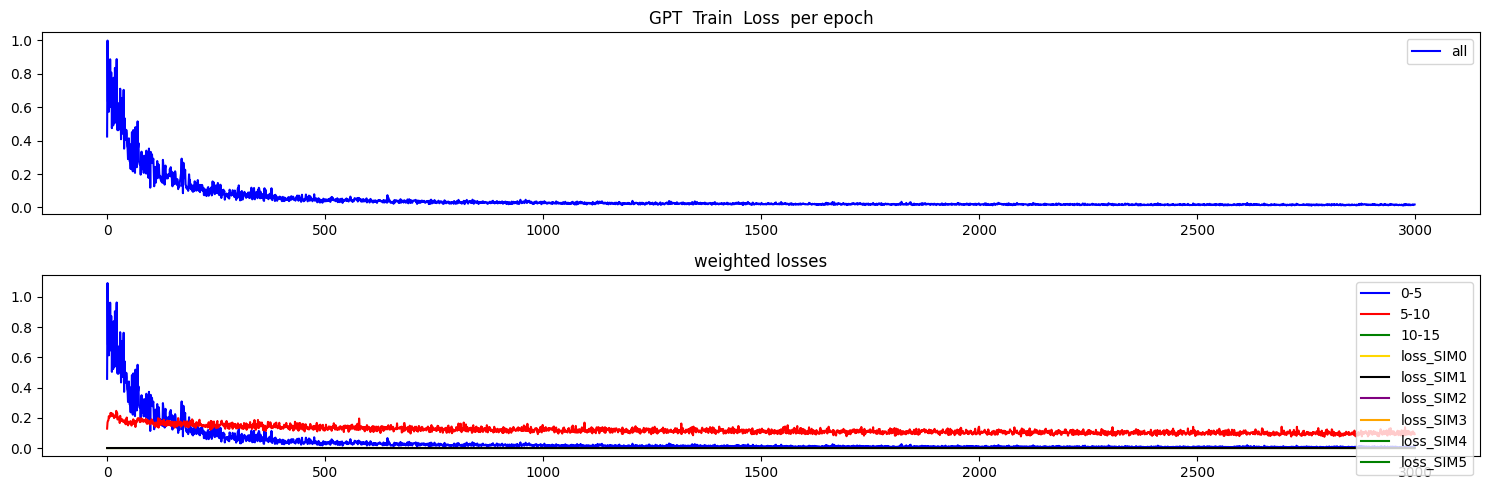

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


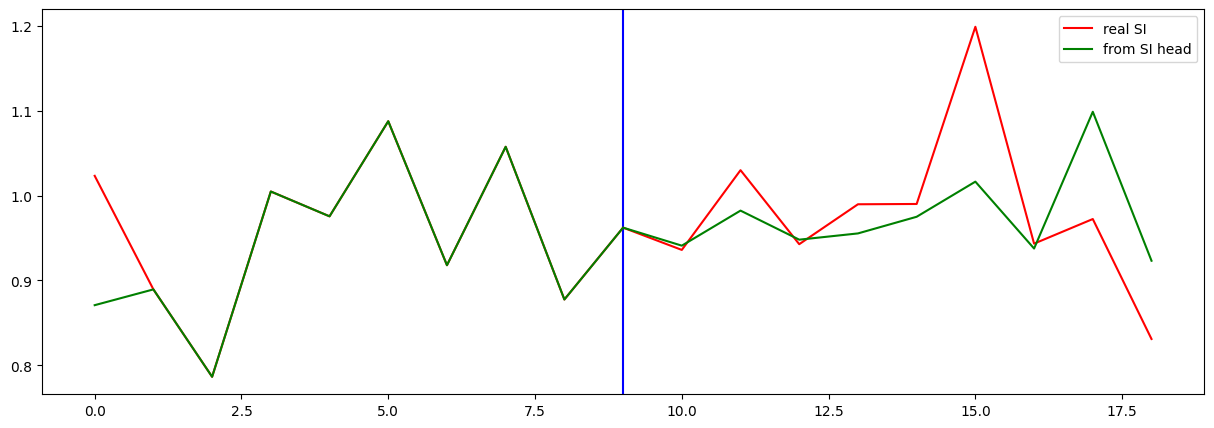

Testing R**2 - (all) - (no inputs):  0.9874742132444257
Testing R**2 - (f2) - SI full (no inputs):  -1.4037630251033826
Testing R**2 - SI head only (no inputs):  -0.9754418094346369
0 ...index R**2 (no inputs):  -0.29911532023627374
1 ...index R**2 (no inputs):  -5.453500727087294
2 ...index R**2 (no inputs):  -1.4037630251033826
3 ...index R**2 (no inputs):  -11.366649520499799
4 ...index R**2 (no inputs):  -2.2184559681941747
5 ...index R**2 (no inputs):  -2.0422325059009787
6 ...index R**2 (no inputs):  -2137.3871523421058
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12497327570732031
10 ...index R**2 (no inputs):  -0.2879691820392458
11 ...index R**2 (no inputs):  -503.4529239015166
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.4677947906523707
16 ...index R**2 (no inputs):  -0.2446472756006517
17 ...index R**2 (no inputs):  -530.29620

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.760498
Loss_SI: 0.8295531868934631 Loss_all: 0.1390046924352646
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.164887
Loss_SI: 0.16763775050640106 Loss_all: 0.14012640714645386
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.070392
Loss_SI: 0.06307325512170792 Loss_all: 0.13626357913017273
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.027657
Loss_SI: 0.017118893563747406 Loss_all: 0.12250106781721115
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.030349
Loss_SI: 0.01918730139732361 Loss_all: 0.13079960644245148
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.024982
Loss_SI: 0.014683745801448822 Loss_all: 0.11766299605369568
Prediction shape: torch.Size([32, 35])
===


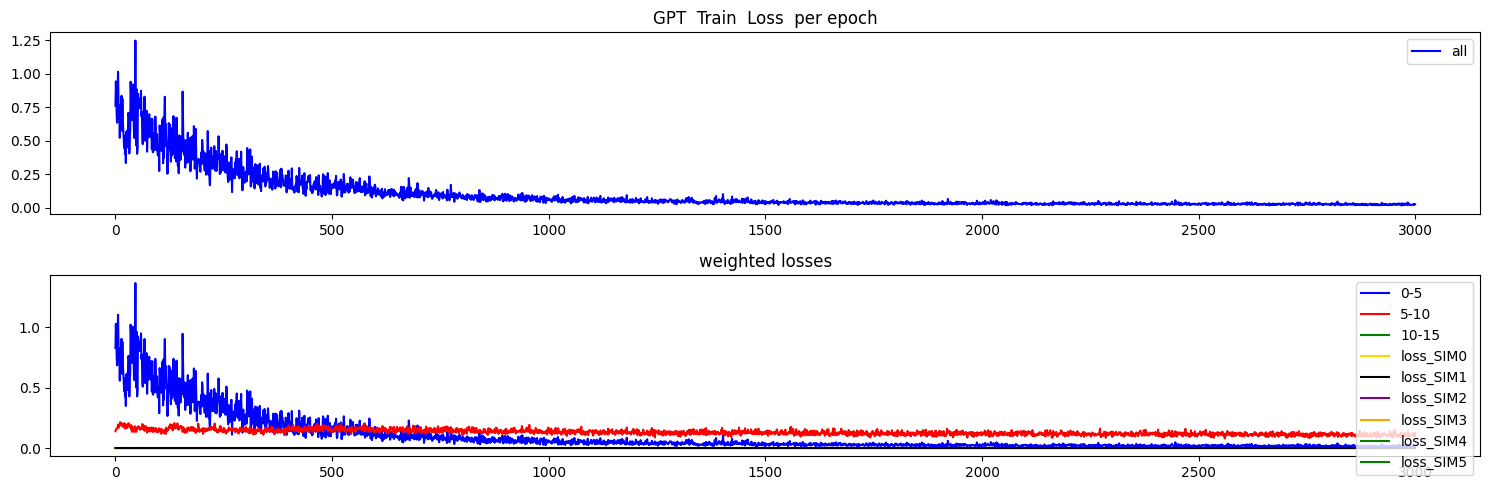

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


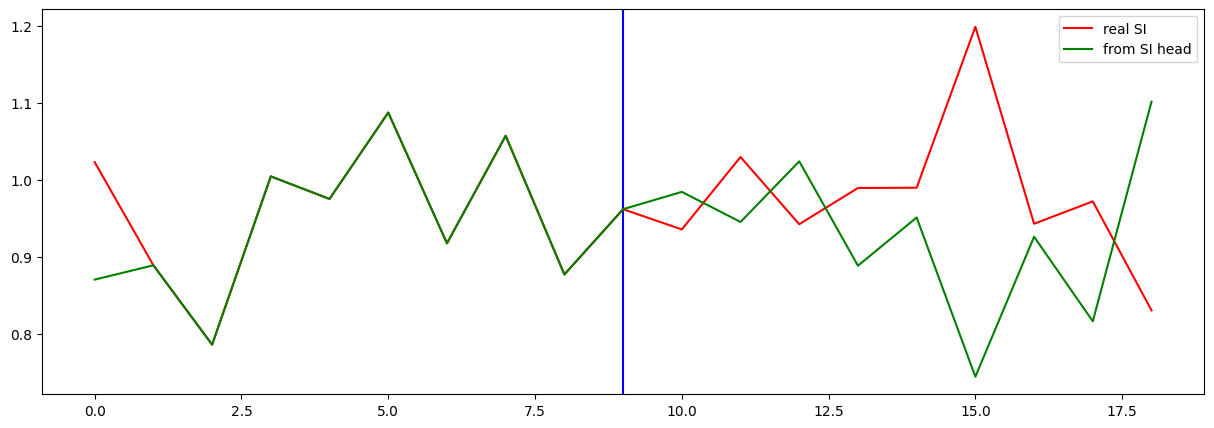

Testing R**2 - (all) - (no inputs):  0.9937797283754213
Testing R**2 - (f2) - SI full (no inputs):  -1.5597953010637973
Testing R**2 - SI head only (no inputs):  -0.6063241040926217
0 ...index R**2 (no inputs):  0.35015835814635865
1 ...index R**2 (no inputs):  -2.6769858386301144
2 ...index R**2 (no inputs):  -1.5597953010637973
3 ...index R**2 (no inputs):  -7.000218527132656
4 ...index R**2 (no inputs):  -1.456309752140546
5 ...index R**2 (no inputs):  -0.2904980703030946
6 ...index R**2 (no inputs):  -434.3323017263181
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.028095920938044
10 ...index R**2 (no inputs):  -0.3771063628293465
11 ...index R**2 (no inputs):  -834.6921963084238
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.633321723005049
16 ...index R**2 (no inputs):  -0.04032606452849641
17 ...index R**2 (no inputs):  -551.8672764912

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.669091
Loss_SI: 0.7272593975067139 Loss_all: 0.14557965099811554
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.153475
Loss_SI: 0.1554044634103775 Loss_all: 0.13611362874507904
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.155086
Loss_SI: 0.15407833456993103 Loss_all: 0.16415143013000488
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.071627
Loss_SI: 0.06434939801692963 Loss_all: 0.13712196052074432
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.076922
Loss_SI: 0.07264409959316254 Loss_all: 0.11542730033397675
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.033643
Loss_SI: 0.023348219692707062 Loss_all: 0.12629356980323792
Prediction shape: torch.Size([32, 35])
===


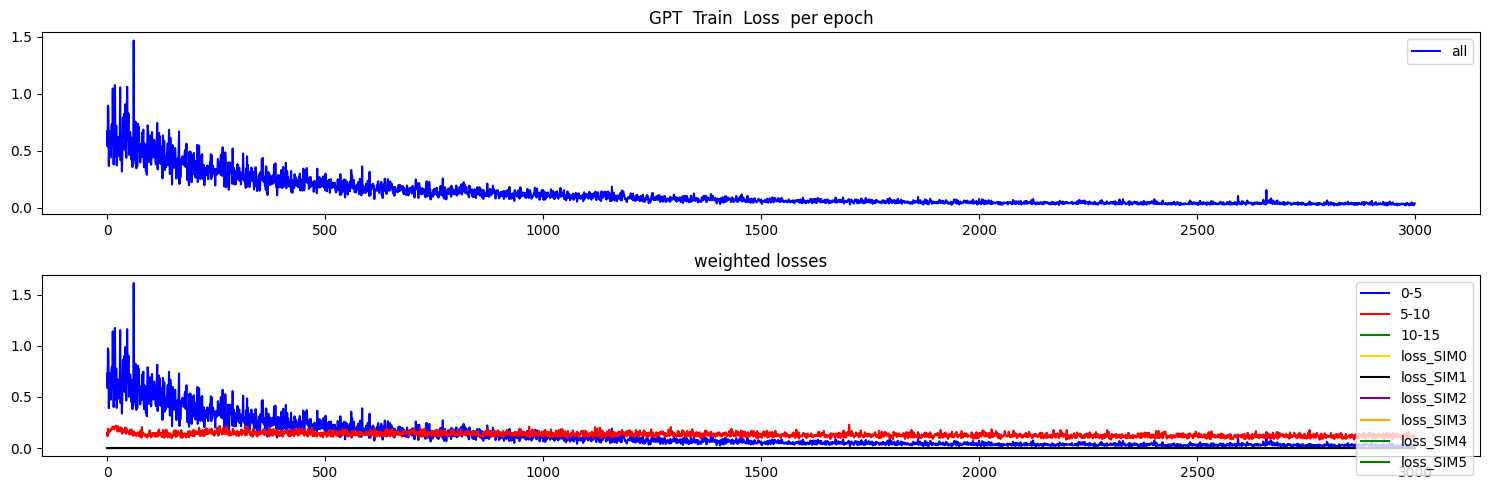

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


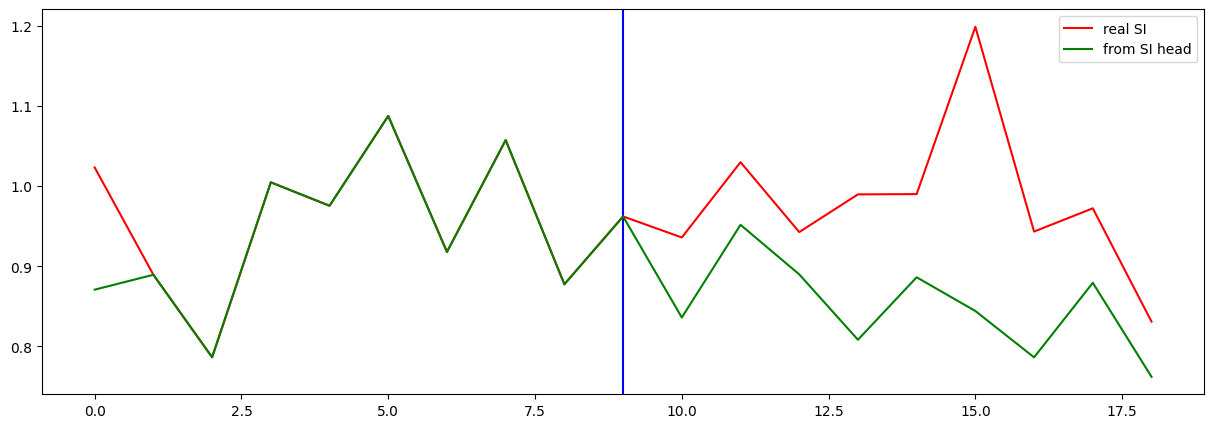

Testing R**2 - (all) - (no inputs):  0.9934928156099385
Testing R**2 - (f2) - SI full (no inputs):  -1.358213825703396
Testing R**2 - SI head only (no inputs):  -2.8429069014484702
0 ...index R**2 (no inputs):  -2.0691283244944154
1 ...index R**2 (no inputs):  -2.2143516780237706
2 ...index R**2 (no inputs):  -1.358213825703396
3 ...index R**2 (no inputs):  -17.94094019602619
4 ...index R**2 (no inputs):  -6.80491262261387
5 ...index R**2 (no inputs):  -0.32893634547857187
6 ...index R**2 (no inputs):  -220.4568174158004
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2849428947156556
10 ...index R**2 (no inputs):  -0.47228938337053594
11 ...index R**2 (no inputs):  -92.81896881790468
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.6206166226457099
16 ...index R**2 (no inputs):  -0.02620619302543492
17 ...index R**2 (no inputs):  -1760.82386869

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.771847
Loss_SI: 0.8396567702293396 Loss_all: 0.1615617722272873
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.239373
Loss_SI: 0.25069233775138855 Loss_all: 0.13749727606773376
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.131690
Loss_SI: 0.13086161017417908 Loss_all: 0.13914255797863007
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.110758
Loss_SI: 0.10885120928287506 Loss_all: 0.12791943550109863
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.081960
Loss_SI: 0.07622266560792923 Loss_all: 0.13359729945659637
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.076965
Loss_SI: 0.07114148139953613 Loss_all: 0.12938085198402405
Prediction shape: torch.Size([32, 35])
===


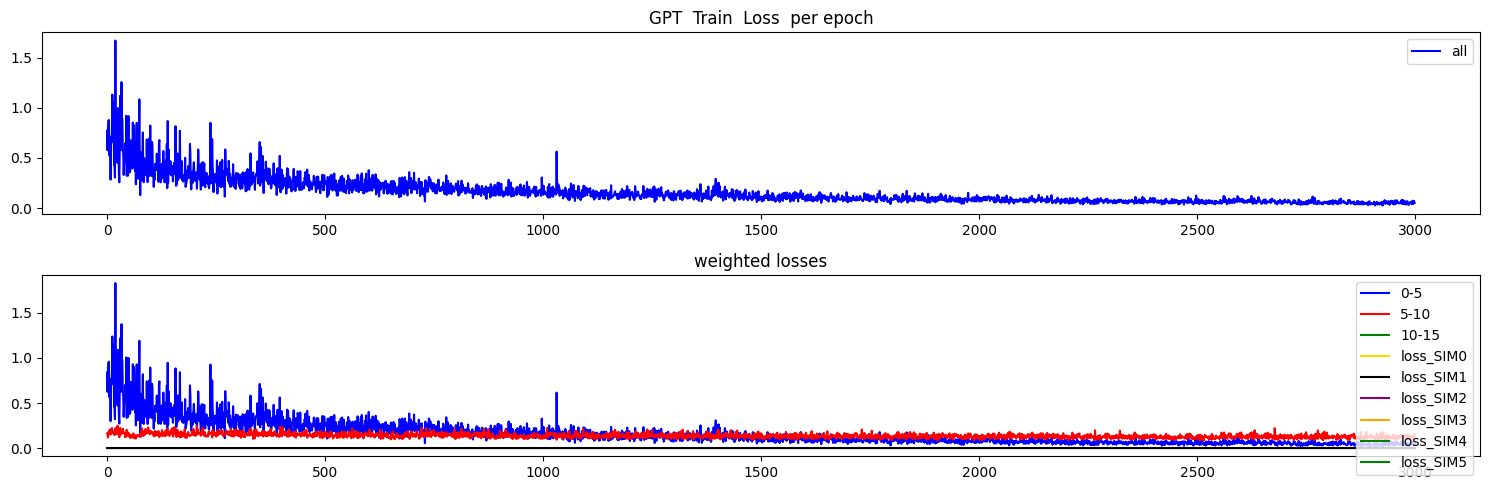

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


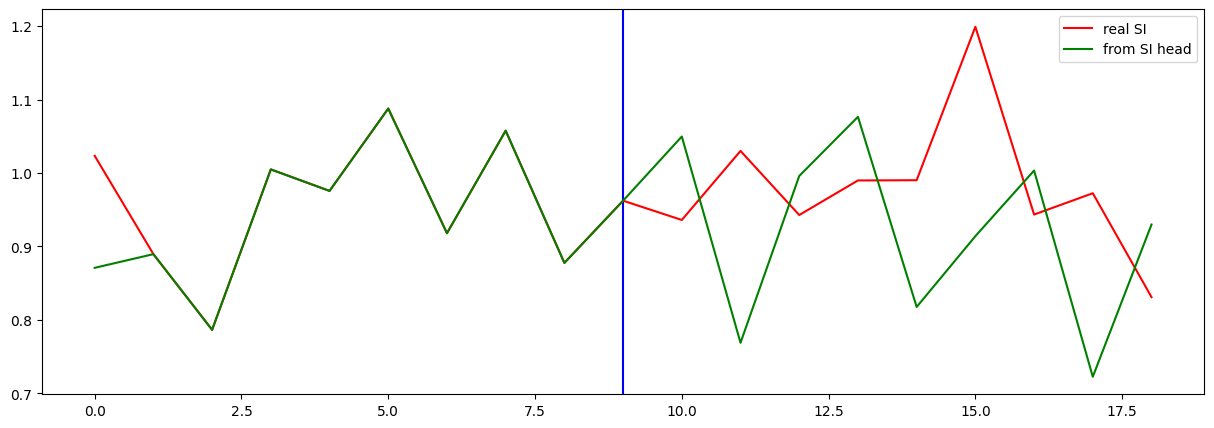

Testing R**2 - (all) - (no inputs):  0.9872029010292684
Testing R**2 - (f2) - SI full (no inputs):  -1.0725146056278394
Testing R**2 - SI head only (no inputs):  -1.6964815292299193
0 ...index R**2 (no inputs):  -0.557617474586628
1 ...index R**2 (no inputs):  -9.937194116627436
2 ...index R**2 (no inputs):  -1.0725146056278394
3 ...index R**2 (no inputs):  -29.025914216431463
4 ...index R**2 (no inputs):  -10.65454855867948
5 ...index R**2 (no inputs):  -1.8666442377357328
6 ...index R**2 (no inputs):  -5052.127474006417
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.4741403175829535
10 ...index R**2 (no inputs):  -1.4990268588092697
11 ...index R**2 (no inputs):  -1556.5252609389051
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7534516099208137
16 ...index R**2 (no inputs):  -7.628114880331438e-05
17 ...index R**2 (no inputs):  -8751.671168

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.689475
Loss_SI: 0.7521536350250244 Loss_all: 0.12536285817623138
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.058525
Loss_SI: 0.049824513494968414 Loss_all: 0.13683290779590607
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.024259
Loss_SI: 0.013748946599662304 Loss_all: 0.11884865909814835
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.017958
Loss_SI: 0.008592449128627777 Loss_all: 0.10224863141775131
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.017624
Loss_SI: 0.006360931321978569 Loss_all: 0.11898879706859589
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.015638
Loss_SI: 0.007284117862582207 Loss_all: 0.09081999212503433
Prediction shape: torch.Size([32, 35])
===


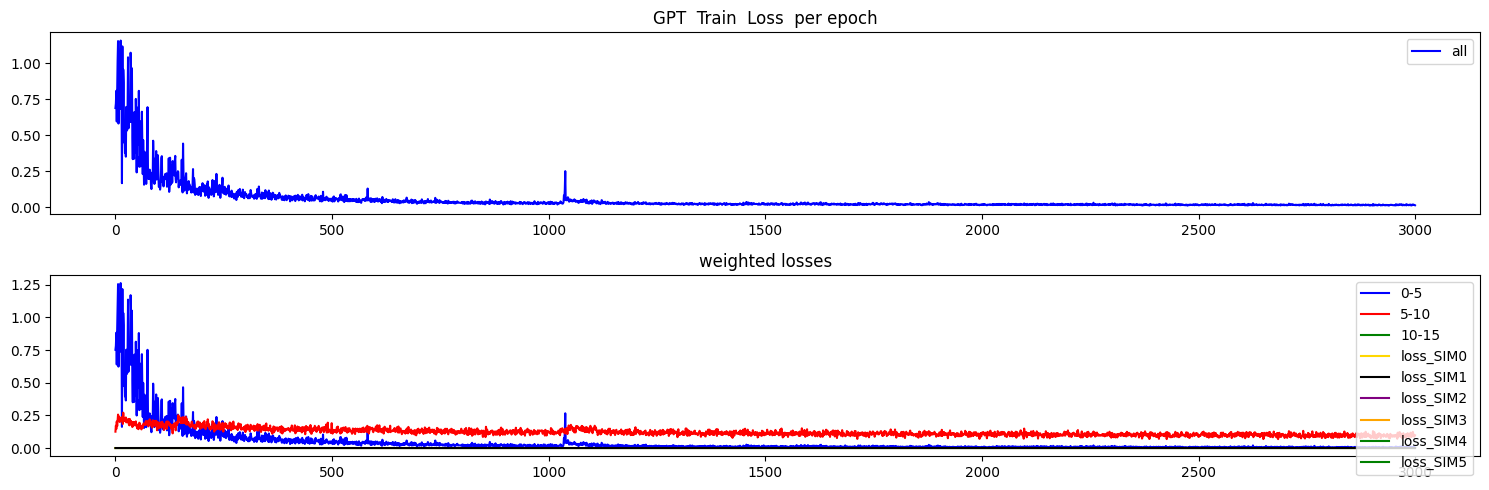

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


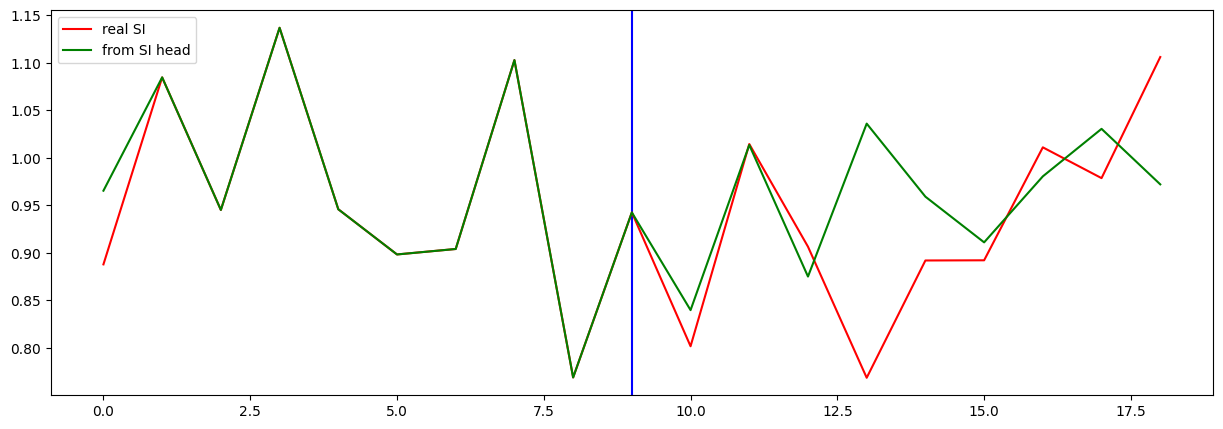

Testing R**2 - (all) - (no inputs):  0.9624400772798402
Testing R**2 - (f2) - SI full (no inputs):  -1.0661663938865602
Testing R**2 - SI head only (no inputs):  -0.308043186095206
0 ...index R**2 (no inputs):  -0.13335958029364714
1 ...index R**2 (no inputs):  0.06677924417195302
2 ...index R**2 (no inputs):  -1.0661663938865602
3 ...index R**2 (no inputs):  -0.6839032348459351
4 ...index R**2 (no inputs):  -188.7581261459311
5 ...index R**2 (no inputs):  -40.14614279387461
6 ...index R**2 (no inputs):  -0.7820493905503068
7 ...index R**2 (no inputs):  0.08997788818199715
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9139179871486969
10 ...index R**2 (no inputs):  -0.3309406804322792
11 ...index R**2 (no inputs):  -2.756411551612263
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.6624780058470754
16 ...index R**2 (no inputs):  -0.1378953820155453
17 ...index R**2 (no inputs)

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.316967
Loss_SI: 0.3353925347328186 Loss_all: 0.1511421650648117
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.323300
Loss_SI: 0.34809452295303345 Loss_all: 0.10014807432889938
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.069579
Loss_SI: 0.061971962451934814 Loss_all: 0.13804222643375397
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.047182
Loss_SI: 0.03559819608926773 Loss_all: 0.1514403522014618
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.039974
Loss_SI: 0.03332267701625824 Loss_all: 0.09983891248703003
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.025796
Loss_SI: 0.015206659212708473 Loss_all: 0.12110423296689987
Prediction shape: torch.Size([32, 35])
===


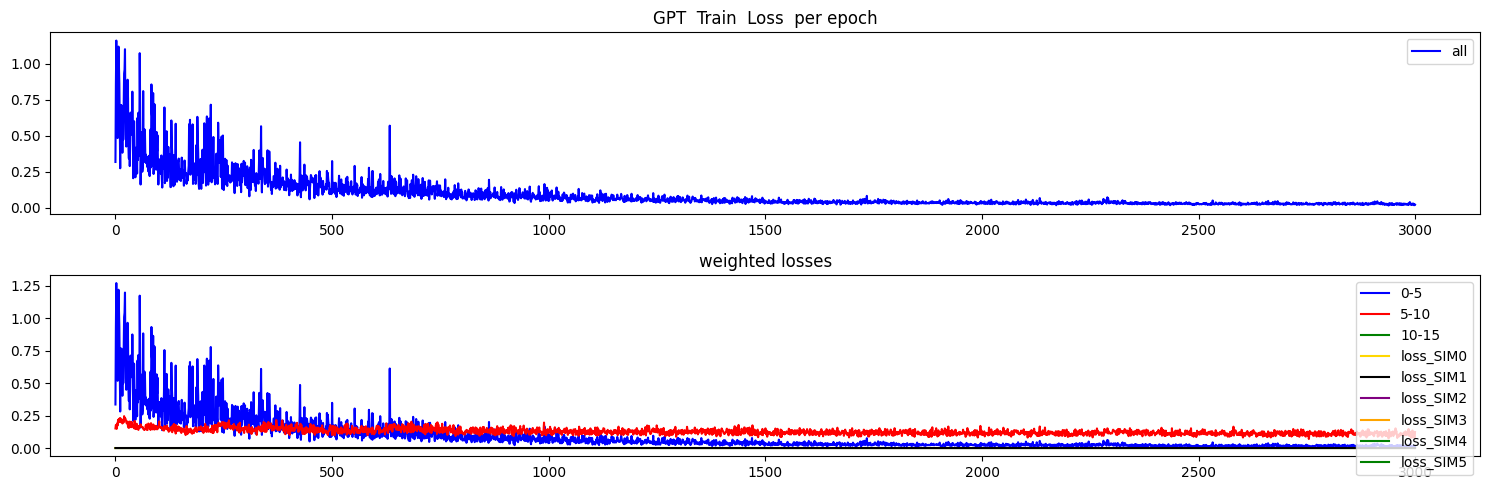

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


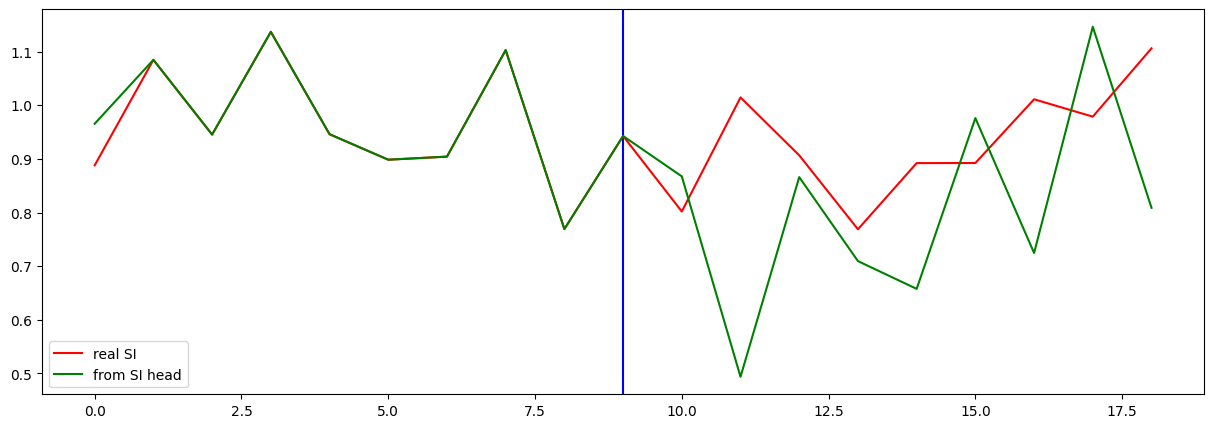

Testing R**2 - (all) - (no inputs):  0.9837067435424848
Testing R**2 - (f2) - SI full (no inputs):  -7.361694455756963
Testing R**2 - SI head only (no inputs):  -3.6998975416789994
0 ...index R**2 (no inputs):  -0.5043670418008444
1 ...index R**2 (no inputs):  -2.8492874852201395
2 ...index R**2 (no inputs):  -7.361694455756963
3 ...index R**2 (no inputs):  0.06790195716323488
4 ...index R**2 (no inputs):  -12.124223314353246
5 ...index R**2 (no inputs):  -16.610627407854388
6 ...index R**2 (no inputs):  -4.803694068794159
7 ...index R**2 (no inputs):  -0.002234575604276756
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.41095005677584695
10 ...index R**2 (no inputs):  -0.048207971024028184
11 ...index R**2 (no inputs):  -118.39604145260903
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -11.564251795412453
16 ...index R**2 (no inputs):  -0.5175198831615806
17 ...index R**2 (no inp

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.479136
Loss_SI: 0.5174117088317871 Loss_all: 0.1346568912267685
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.172488
Loss_SI: 0.17438359558582306 Loss_all: 0.15543232858181
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.082739
Loss_SI: 0.07087203860282898 Loss_all: 0.1895412802696228
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.064788
Loss_SI: 0.058605510741472244 Loss_all: 0.12043397128582001
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.041593
Loss_SI: 0.03373930603265762 Loss_all: 0.11227215081453323
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.038637
Loss_SI: 0.030834106728434563 Loss_all: 0.10886324942111969
Prediction shape: torch.Size([32, 35])
===


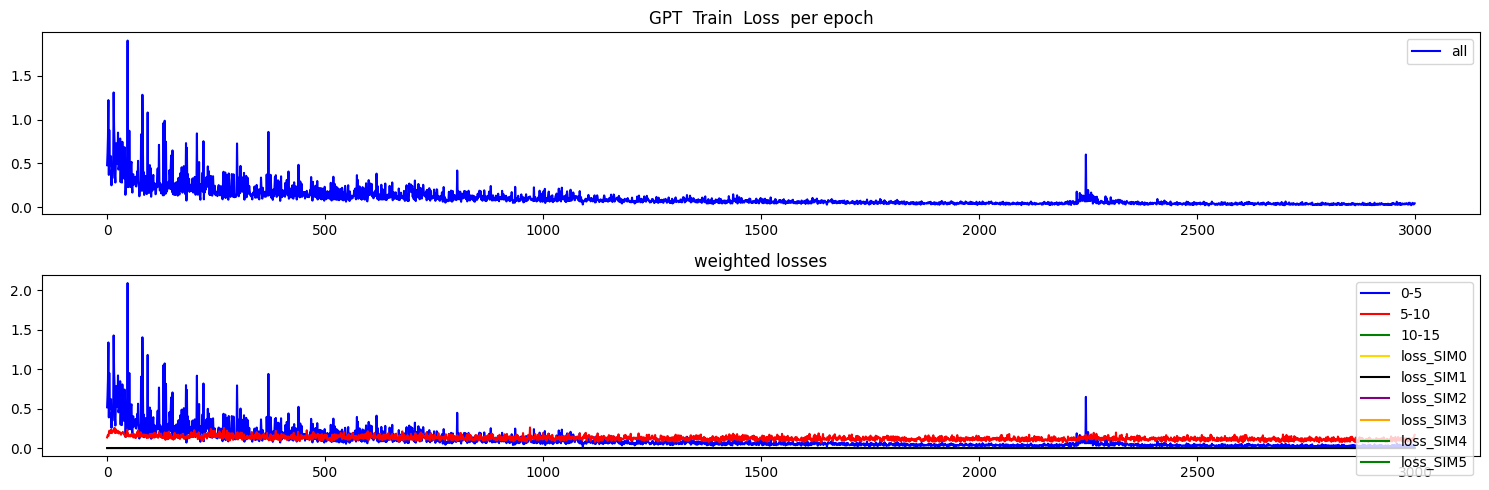

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


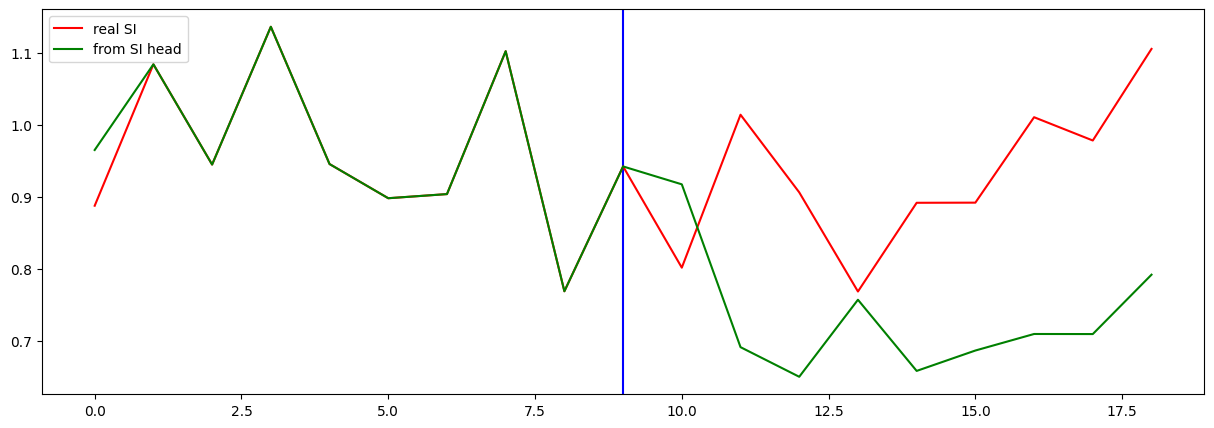

Testing R**2 - (all) - (no inputs):  0.9944996217644154
Testing R**2 - (f2) - SI full (no inputs):  -1.9832647328633648
Testing R**2 - SI head only (no inputs):  -5.287549066329703
0 ...index R**2 (no inputs):  -0.3548470758877631
1 ...index R**2 (no inputs):  -1.0350386202026787
2 ...index R**2 (no inputs):  -1.9832647328633648
3 ...index R**2 (no inputs):  -0.0954607120136135
4 ...index R**2 (no inputs):  -115.63137994651056
5 ...index R**2 (no inputs):  -4.680901758267194
6 ...index R**2 (no inputs):  -3.2484924939673956
7 ...index R**2 (no inputs):  -0.13384690627772722
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.039160920936639476
10 ...index R**2 (no inputs):  -0.03468725359353941
11 ...index R**2 (no inputs):  -156.30784792413996
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -29.60768198644997
16 ...index R**2 (no inputs):  -0.1036194618457904
17 ...index R**2 (no inpu

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.568684
Loss_SI: 0.6192216873168945 Loss_all: 0.11384820938110352
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.176495
Loss_SI: 0.1764758825302124 Loss_all: 0.17666570842266083
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.140021
Loss_SI: 0.1410510241985321 Loss_all: 0.13074706494808197
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.118739
Loss_SI: 0.11239604651927948 Loss_all: 0.17582693696022034
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.095266
Loss_SI: 0.09090281277894974 Loss_all: 0.13453499972820282
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.095100
Loss_SI: 0.09136165678501129 Loss_all: 0.12874126434326172
Prediction shape: torch.Size([32, 35])
===


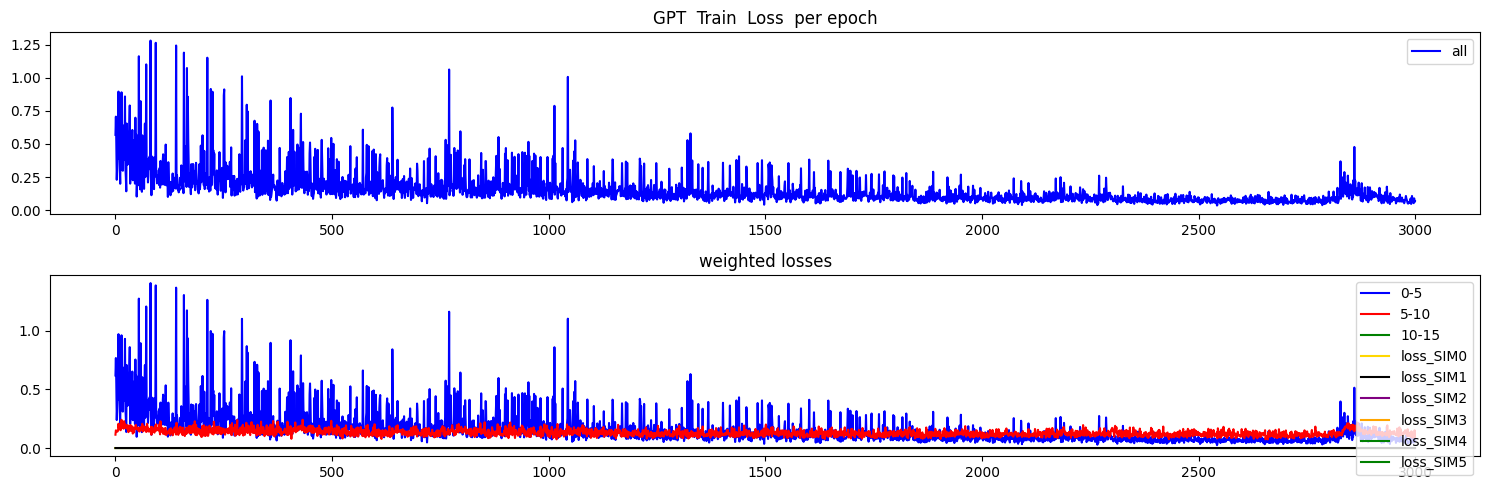

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


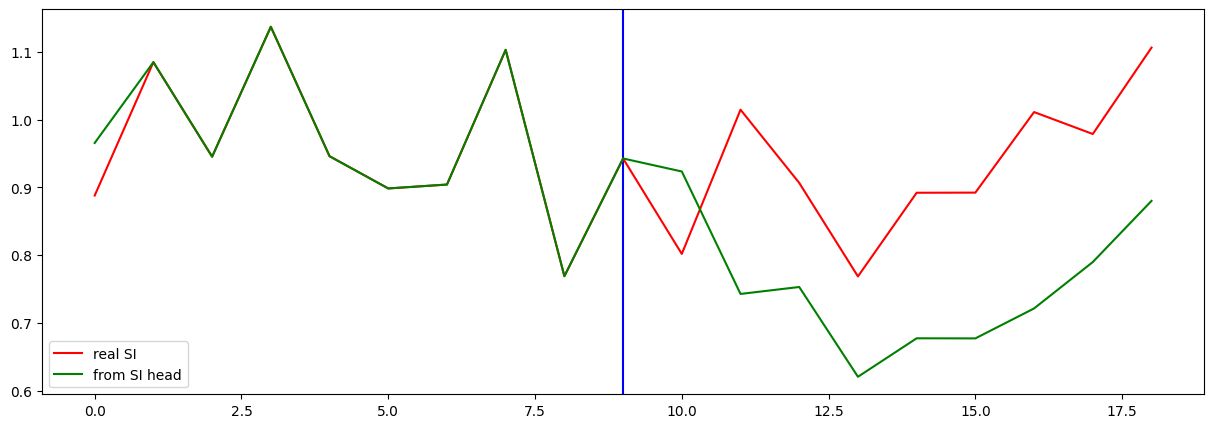

Testing R**2 - (all) - (no inputs):  0.9901563268838908
Testing R**2 - (f2) - SI full (no inputs):  -4.139973851420625
Testing R**2 - SI head only (no inputs):  -4.589562306288342
0 ...index R**2 (no inputs):  -0.13672902806412068
1 ...index R**2 (no inputs):  -0.18326902448922766
2 ...index R**2 (no inputs):  -4.139973851420625
3 ...index R**2 (no inputs):  -1.400354336341596
4 ...index R**2 (no inputs):  -4139.331854085157
5 ...index R**2 (no inputs):  -9.38032408348855
6 ...index R**2 (no inputs):  -5.289419420614309
7 ...index R**2 (no inputs):  -2.4823164572590235
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8738203208908126
10 ...index R**2 (no inputs):  -0.2215269757506988
11 ...index R**2 (no inputs):  -400.45920963896714
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -33.09566789120094
16 ...index R**2 (no inputs):  -4.796489073054174
17 ...index R**2 (no inputs):  -3

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.905104
Loss_SI: 0.9872013330459595 Loss_all: 0.1662246286869049
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.058803
Loss_SI: 0.050626032054424286 Loss_all: 0.1323976069688797
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.024094
Loss_SI: 0.01640738546848297 Loss_all: 0.09327391535043716
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.019398
Loss_SI: 0.009415955282747746 Loss_all: 0.10923176258802414
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.018575
Loss_SI: 0.01264261081814766 Loss_all: 0.07196351885795593
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.023060
Loss_SI: 0.015476642176508904 Loss_all: 0.09131055325269699
Prediction shape: torch.Size([32, 35])
===


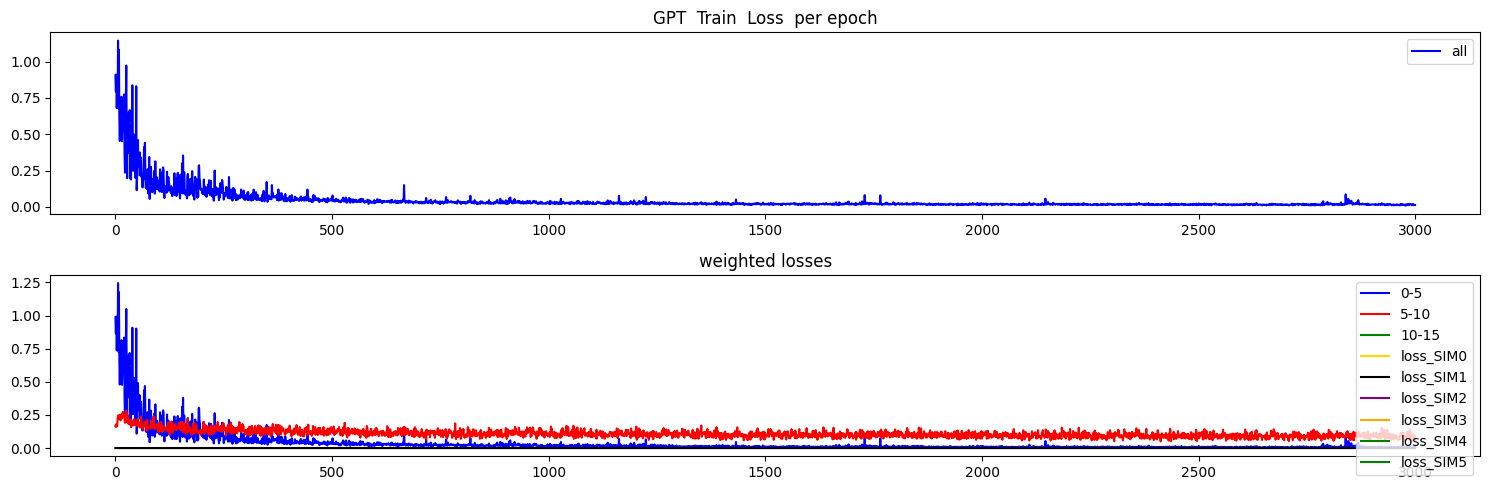

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


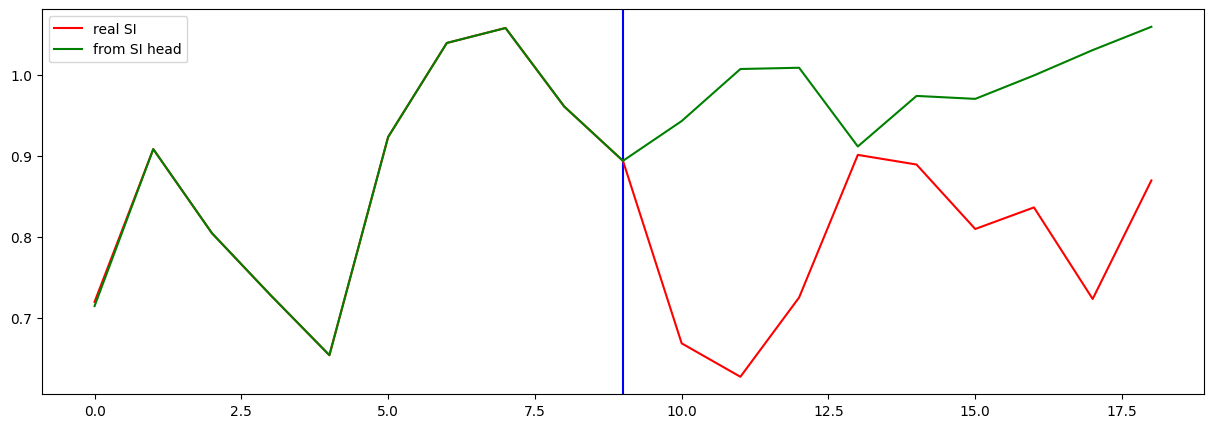

Testing R**2 - (all) - (no inputs):  0.9911761078757471
Testing R**2 - (f2) - SI full (no inputs):  -9.178896921871567
Testing R**2 - SI head only (no inputs):  -5.3742112965628515
0 ...index R**2 (no inputs):  -0.18406233031350472
1 ...index R**2 (no inputs):  -2.421400475604108
2 ...index R**2 (no inputs):  -9.178896921871567
3 ...index R**2 (no inputs):  -375.1813307367541
4 ...index R**2 (no inputs):  -14.535718614883544
5 ...index R**2 (no inputs):  -0.48611121387386613
6 ...index R**2 (no inputs):  -23.637927732993944
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.6428751215282538
10 ...index R**2 (no inputs):  0.09736341913276958
11 ...index R**2 (no inputs):  -40.423236272238874
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.8034355085505172
16 ...index R**2 (no inputs):  -1.64986988321253
17 ...index R**2 (no inputs):  -1694.09341634

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.559610
Loss_SI: 0.6095151305198669 Loss_all: 0.11046519875526428
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.188608
Loss_SI: 0.19826452434062958 Loss_all: 0.10169582068920135
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.051493
Loss_SI: 0.04796232283115387 Loss_all: 0.08326935023069382
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.063818
Loss_SI: 0.056812915951013565 Loss_all: 0.1268654763698578
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.031751
Loss_SI: 0.020264945924282074 Loss_all: 0.13512097299098969
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.020966
Loss_SI: 0.015455642715096474 Loss_all: 0.07055981457233429
Prediction shape: torch.Size([32, 35])
===


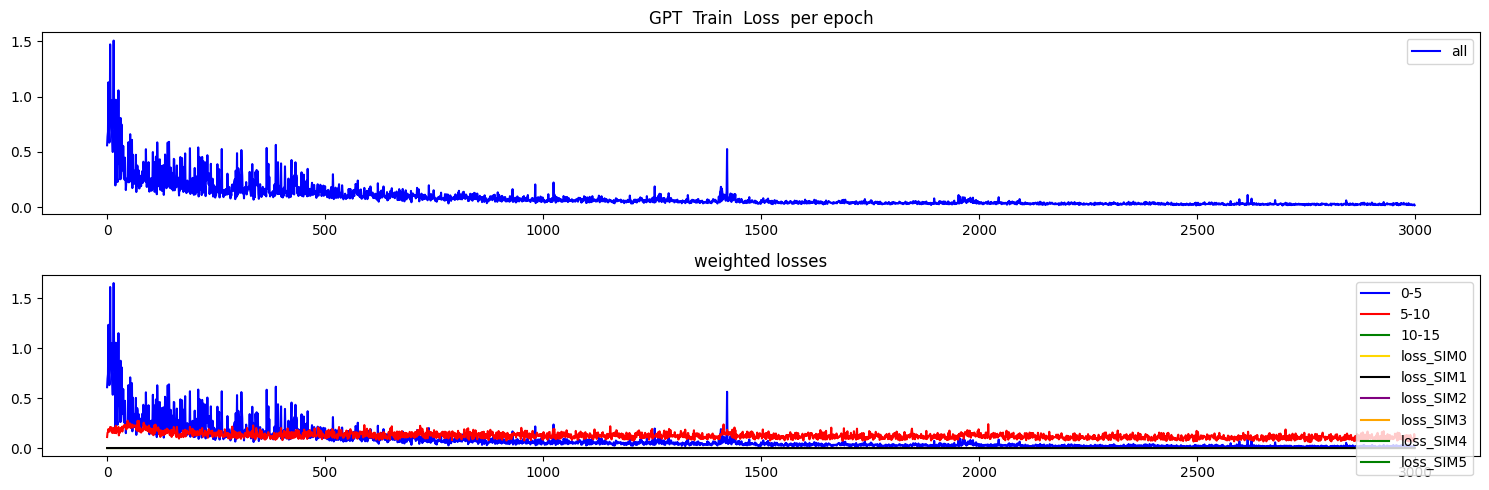

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


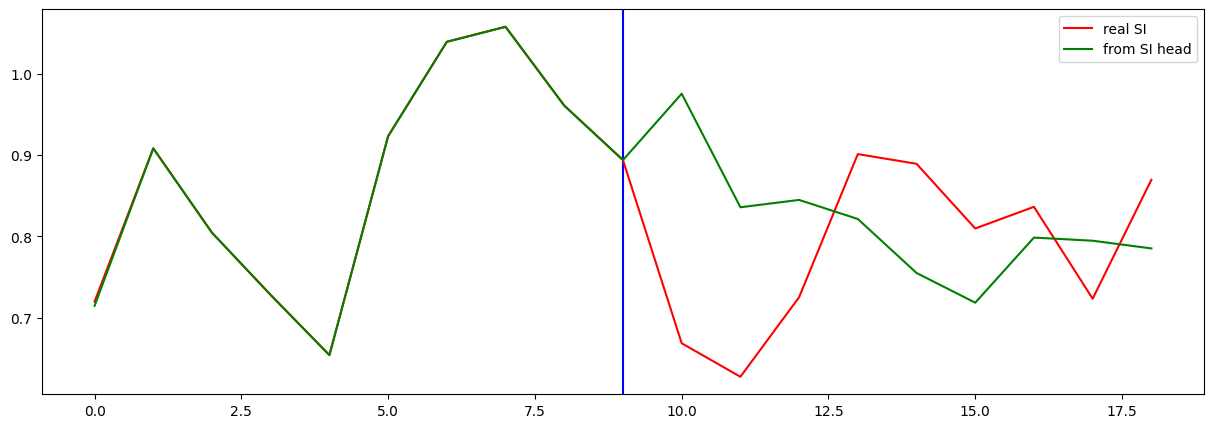

Testing R**2 - (all) - (no inputs):  0.9862159715805123
Testing R**2 - (f2) - SI full (no inputs):  -2.0579194491975192
Testing R**2 - SI head only (no inputs):  -1.4416906292281255
0 ...index R**2 (no inputs):  -0.8477076837105009
1 ...index R**2 (no inputs):  -2.864916817068106
2 ...index R**2 (no inputs):  -2.0579194491975192
3 ...index R**2 (no inputs):  -92.145487174584
4 ...index R**2 (no inputs):  -115.50819395681553
5 ...index R**2 (no inputs):  -1.3207701391990252
6 ...index R**2 (no inputs):  -29.844980023055157
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4460789389458968
10 ...index R**2 (no inputs):  -1.3187761900013952
11 ...index R**2 (no inputs):  -145.53619684952602
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.8955259363774295
16 ...index R**2 (no inputs):  -3.7149911004275253
17 ...index R**2 (no inputs):  -3189.68642578

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.320844
Loss_SI: 0.34463804960250854 Loss_all: 0.10670100152492523
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.208758
Loss_SI: 0.21347576379776 Loss_all: 0.16629910469055176
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.147665
Loss_SI: 0.1476840376853943 Loss_all: 0.14749570190906525
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.055433
Loss_SI: 0.05059582367539406 Loss_all: 0.09896735846996307
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.043569
Loss_SI: 0.037484053522348404 Loss_all: 0.09833230823278427
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.030393
Loss_SI: 0.022556204348802567 Loss_all: 0.10092000663280487
Prediction shape: torch.Size([32, 35])
===


KeyboardInterrupt: 

In [ ]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [ ]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


In [ ]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


In [ ]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


In [ ]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


In [ ]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [ ]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [ ]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


In [ ]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


In [ ]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


In [ ]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)



## First Few R2


In [ ]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [ ]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


In [ ]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


In [ ]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



In [ ]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )



## Plot


In [ ]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
